# Exploratory Data Analysis (EDA) of AIA Data

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sunpy
import sunpy.map
import os
import sunpy.visualization.colormaps

%matplotlib inline

In [59]:
!wget -r https://jsoc1.stanford.edu/SUM2/D1515570274/S00000/

--2022-05-24 12:44:32--  https://jsoc1.stanford.edu/SUM2/D1515570274/S00000/
Resolving jsoc1.stanford.edu (jsoc1.stanford.edu)... 171.64.103.240
Connecting to jsoc1.stanford.edu (jsoc1.stanford.edu)|171.64.103.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10670 (10K) [text/html]
Saving to: ‘jsoc1.stanford.edu/SUM2/D1515570274/S00000/index.html’

jsoc1.stanford.edu/ 100%[===================>]  10.42K  --.-KB/s    in 0s      

2022-05-24 12:44:33 (63.2 MB/s) - ‘jsoc1.stanford.edu/SUM2/D1515570274/S00000/index.html’ saved [10670/10670]

Loading robots.txt; please ignore errors.
--2022-05-24 12:44:33--  https://jsoc1.stanford.edu/robots.txt
Reusing existing connection to jsoc1.stanford.edu:443.
HTTP request sent, awaiting response... 404 Not Found
2022-05-24 12:44:33 ERROR 404: Not Found.

--2022-05-24 12:44:33--  https://jsoc1.stanford.edu/SUM2/D1515570274/S00000/aia.lev1_euv_12s.2014-10-13T000012Z.171.image_lev1.fits
Reusing existing connection to jsoc1.st

In [60]:
data_path = 'jsoc1.stanford.edu/SUM2/D1515570274/S00000/' 
images = os.listdir(data_path)
im_list = [os.path.join(data_path, str(im)) for im in images]
im_list[0]

'jsoc1.stanford.edu/SUM2/D1515570274/S00000/aia.lev1_euv_12s.2014-10-13T060012Z.171.image_lev1.fits'

In [76]:
len(images)

41

In [65]:
n=10
aia_map = sunpy.map.Map(im_list[n])
aia_map.plot

<bound method GenericMap.plot of <sunpy.map.sources.sdo.AIAMap object at 0x7fa4e9795d30>
SunPy Map
---------
Observatory:		 SDO
Instrument:		 AIA 3
Detector:		 AIA
Measurement:		 171.0 Angstrom
Wavelength:		 171.0 Angstrom
Observation Date:	 2014-10-18 18:00:11
Exposure Time:		 1.9996209999999999 s
Dimension:		 [4096. 4096.] pix
Coordinate System:	 helioprojective
Scale:			 [0.59948897 0.59948897] arcsec / pix
Reference Pixel:	 [2052.7800293  2046.93994141] pix
Reference Coord:	 [0. 0.] arcsec                   
array([[ 1,  0,  0, ...,  1,  1, -1],
       [-2,  1,  1, ..., -1,  0,  1],
       [ 2,  1, -1, ...,  0,  0, -2],
       ...,
       [-2,  0,  0, ..., -1,  2,  1],
       [ 0,  2,  1, ...,  0,  1,  2],
       [ 0,  0,  2, ...,  1,  1, -2]], dtype=int16)>

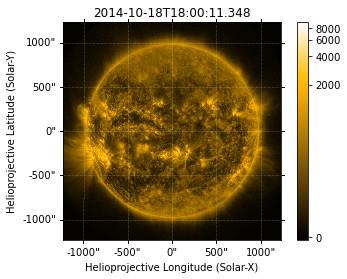

In [72]:
aia_map.plot_settings['title'] = f"{aia_map.date.value}"
aia_map.plot_settings['cmap'] = plt.get_cmap('sdoaia171')  
fig = plt.figure()
aia_map.plot()
plt.colorbar()
plt.show()

In [87]:
aia_map.fits_header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / data type of original image                    
NAXIS   =                    2 / dimension of original image                    
NAXIS1  =                 4096 / length of original image axis                  
NAXIS2  =                 4096 / length of original image axis                  
PCOUNT  =                    0 / size of special data area                      
GCOUNT  =                    1 / one data group (required keyword)              
XTENSION= 'BINTABLE'           / binary table extension                         
BLD_VERS= 'V8R6X   '                                                            
LVL_NUM =                  1.0 / LVL_NUM data level number                      
T_REC   = '2014-10-18T18:00:01.000' / [ISO] Slotted observation time            
TRECSTEP=                 12.0 / [second] T_REC step {T_REC_step}               
TRECEPOC= '1993.01.01_00:00:

In [11]:
help(aia_map)

Help on AIAMap in module sunpy.map.sources.sdo object:

class AIAMap(sunpy.map.mapbase.GenericMap)
 |  AIAMap(data, header, **kwargs)
 |  
 |  AIA Image Map.
 |  
 |  The Atmospheric Imaging Assembly is a set of four telescopes that employ
 |  normal-incidence, multi-layer coated optics to provide narrow-band imaging
 |  of the Sun. It provides high resolution full-disk images of the corona and
 |  transition region up to 0.5 solar radii above the solar limb with 1.5
 |  arcsecond angular resolution and 12-second temporal resolution. It observes
 |  the Sun in the following seven extreme ultraviolet bandpasses: 94 A
 |  (Fe XVIII), 131 A (Fe VIII, XXI), 171 A (Fe IX), 193 A (Fe XII, XXIV),
 |  211 A (Fe XIV), 304 A (He II), 335 A (Fe XVI). One telescope observes
 |  in the visible 1600 A (C IV) and the nearby continuum (1700 A).
 |  
 |  Notes
 |  -----
 |  Observer location: The standard AIA FITS header provides the spacecraft location in multiple
 |  coordinate systems, including Hel

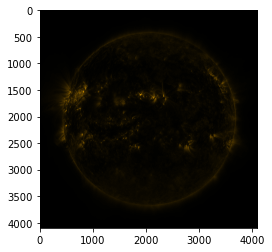

In [83]:
cmap = plt.get_cmap('sdoaia171')
plt.imshow(aia_map.data, cmap=cmap)

In [95]:
date = []
min_arr, max_arr, mean_arr = [],[],[]
dsun_obs, wavelength = [], []
for im in im_list:
    if im.endswith('.fits'):
        aia_map = sunpy.map.Map(im)
        date.append(aia_map.date.value)
        hdr = aia_map.fits_header
        min_arr.append(hdr['DATAMIN'])
        max_arr.append(hdr['DATAMAX'])
        mean_arr.append(hdr['DATAMEAN'])
        dsun_obs.append(hdr['DSUN_OBS'])
        wavelength.append(hdr['WAVELNTH'])
    

In [97]:
# Make a pandas dataframe